<a href="https://colab.research.google.com/github/Gkcoli/CCMACLRL_PROJECT_COM222/blob/main/Predicting_Flight_Delays_A_Machine_Learning_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COLINARES - TAMPARONG**
**Machine learning final project.**

---

# **Predicting Flight Delays: A Machine Learning Approach**

In today's fast-paced world, air travel plays a crucial role in connecting people and goods. However, flight delays can disrupt travel plans and cause significant inconvenience. This project aims to leverage the power of machine learning to predict **total number of flight delays**, providing valuable insights for airlines, passengers, and airport operations.


*Our Goal:*

Develop a machine learning model to predict the number of flight delays above 15 minutes based on historical data.
By understanding the factors that contribute to delays, we can improve proactive planning and minimize disruptions.

Data Source:

We will utilize a publicly available dataset from **Kaggle: https://www.kaggle.com/datasets/giovamata/airlinedelaycauses.** This dataset includes flight information from December 2019 and 2020, containing details like year, reasons of delay, and length of delay.

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df = pd.read_csv('airline_delay.csv')
tobe_predicted = pd.read_csv('newest_airline_delay.csv')

# **Explanation for the column naming scheme:**







**Categorical columns**
> **year**              : Year data collected.

> **month**             : Numeric representation of the month.

> **carrier**           : Carrier code.

> **carrier_name**      : Carrier Name.

> **airport**           : Airport code.

> **airport_name**      : Name of airport.


**Frequency columns**
> **arr_flights**       : Number of flights arriving at airport

> **arr_del15**         : Number of flights more than 15 minutes late.*

> **carrier_ct**        : Number of flights delayed due to air carrier. (e.g. no crew).

> **weather_ct**        : Number of flights due to weather.

> **nas_ct**            : Number of flights delayed due to National Aviation System (e.g. heavy air traffic).

> **security_ct**       : Number of flights canceled due to a security breach.

> **late_aircraft_ct**  : Number of flights delayed as a result of another flight on the same aircraft delayed.

> **arr_cancelled**     : Number of cancelled flights

> **arr_diverted**      : Number of flights that were diverted


**Cumulative columns**
> **arr_delay**         : Total time (minutes) of delayed flight.

> **carrier_delay**     : Total time (minutes) of delay due to air carrier

> **weather_delay**     : Total time (minutes) of delay due to inclement weather.

> **nas_delay**         : Total time (minutes) of delay due to National Aviation System.

> **security_delay**    : Total time (minutes) of delay as a result of a security issue.

> **late_aircraft_delay** : Total time (minutes) of delay flights as a result of a previous flight on the same airplane being late.


#**I. *Data Exploration***
Basic inspection of the raw dataset just to have an understanding about it's contents.

**Checking the first rows of the dataset:**

In [ ]:
tobe_predicted.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",85.0,8.0,4.00,0.49,...,0.0,0.00,2.0,0.0,417.0,245.0,35.0,137.0,0.0,0.0
1,2024,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",85.0,16.0,7.98,2.00,...,0.0,3.88,1.0,1.0,864.0,396.0,168.0,98.0,0.0,202.0
2,2024,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",178.0,23.0,10.96,1.36,...,0.0,5.35,6.0,1.0,1219.0,592.0,40.0,169.0,0.0,418.0
3,2024,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",82.0,18.0,7.06,0.00,...,0.0,6.85,5.0,0.0,988.0,416.0,0.0,172.0,0.0,400.0
4,2024,8,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1919.0,215.0,67.74,8.05,...,0.0,97.49,40.0,1.0,20110.0,9418.0,896.0,2047.0,0.0,7749.0


In [ ]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,...,0.0,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,...,0.0,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,...,0.0,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.0,...,0.0,3.00,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.0,...,0.0,1.00,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3351 non-null   int64  
 1   month                3351 non-null   int64  
 2   carrier              3351 non-null   object 
 3   carrier_name         3351 non-null   object 
 4   airport              3351 non-null   object 
 5   airport_name         3351 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f

In [ ]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,3351.000000,3351.0,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.00000,3343.000000,3343.000000
mean,2019.459266,12.0,298.271014,50.995214,16.065337,1.443144,16.183383,0.137320,17.166069,2.884535,0.575830,3333.868083,1144.763087,177.591385,749.57942,5.400838,1256.533353
std,0.498412,0.0,852.436335,146.484456,41.759516,4.821657,56.423008,0.646479,55.447043,10.126658,2.097884,10284.926623,3371.103512,734.343542,3190.50916,27.161402,4184.451426
min,2019.000000,12.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2019.000000,12.0,35.000000,5.000000,1.490000,0.000000,0.820000,0.000000,0.900000,0.000000,0.000000,230.000000,68.500000,0.000000,21.50000,0.000000,31.000000
50%,2019.000000,12.0,83.000000,12.000000,4.750000,0.060000,2.980000,0.000000,3.280000,0.000000,0.000000,746.000000,272.000000,3.000000,106.00000,0.000000,205.000000
75%,2020.000000,12.0,194.500000,33.000000,12.255000,1.010000,8.870000,0.000000,10.240000,2.000000,0.000000,2095.500000,830.500000,82.000000,362.00000,0.000000,724.000000
max,2020.000000,12.0,19713.000000,2289.000000,697.000000,89.420000,1039.540000,17.310000,819.660000,224.000000,42.000000,160383.000000,55215.000000,14219.000000,82064.00000,553.000000,75179.000000


In [ ]:
# Checking which columns can be used as data to predict and which ones are to be used for categorizing

# List of numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# List of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
['year', 'month', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

Categorical Columns:
['carrier', 'carrier_name', 'airport', 'airport_name']


In [ ]:
# Checking Nan values.
df.isna().sum()

In [ ]:
# Dropping Nan values.
df.dropna(inplace=True)

#**II. *Data Visualization***

Using visualization tools to help us understand the visual look of the dataset.

Visualizing the ratio of flights to delayed flights.

<Figure size 1000x600 with 0 Axes>

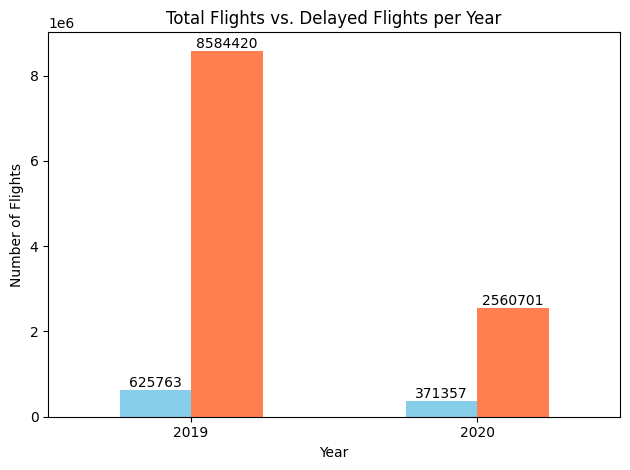

In [ ]:
# Count total flights and flights with delays per year
total_flights_by_year = df.groupby('year')['arr_flights'].sum()
delay_counts_by_year = df.groupby('year')['arr_delay'].sum()

# Combine the counts into a new DataFrame
flight_data = pd.DataFrame({'Total Flights': total_flights_by_year, 'Delayed Flights': delay_counts_by_year})

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
bars = flight_data.plot(kind='bar', color=['skyblue', 'coral'], legend=False)

# Add labels for each bar segment
for bar_container in bars.containers:
    for rect in bar_container:
        yval = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, yval + 5, int(yval), ha='center', va='bottom')  # Adjust label position

plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Total Flights vs. Delayed Flights per Year')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

Showcasing the ratio of delay reasons, to help visualize which factors have influenced flight delays more than others

In [ ]:
# Calculate the sum of each delay type
delay_sums = df[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']].sum()

# Create a DataFrame for plotting
delay_df = pd.DataFrame({'Delay Type': delay_sums.index, 'Total Delay': delay_sums.values})

# Create the pie chart using plotly
plt.figure(figsize=(6,4))
fig = px.pie(delay_df, values='Total Delay', names='Delay Type', title='Ratio of Delay Types')

fig.show()

<Figure size 600x400 with 0 Axes>

Showcasing just how many minutes are lost in a year due to different causes of
delays.

<Figure size 1200x600 with 0 Axes>

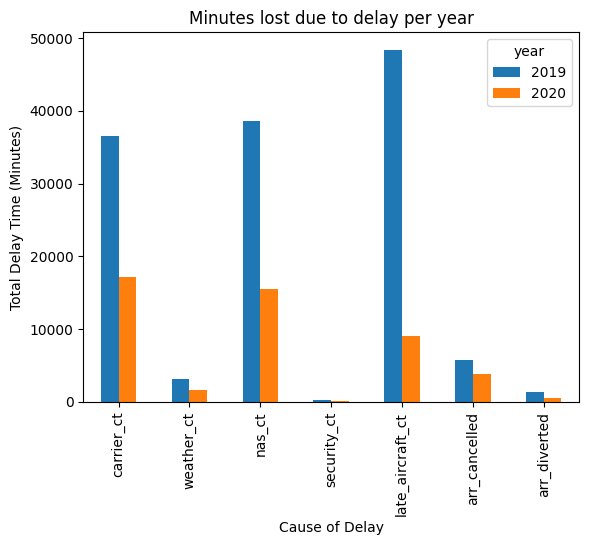

In [ ]:
# Calculate the sum of each delay type per carrier
delay_causes = df.groupby('year')[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']].sum()

# Transpose the DataFrame for easier plotting
delay_causes = delay_causes.T

# Create the plot
plt.figure(figsize=(12, 6))
delay_causes.plot(kind='bar')
plt.xlabel('Cause of Delay')
plt.ylabel('Total Delay Time (Minutes)')
plt.title('Minutes lost due to delay per year')
plt.show()

In [ ]:
total_delay_time = df['arr_delay'].sum()
print(f"Total Delay Time across all flights: {total_delay_time} minutes")

Total Delay Time across all flights: 11145121.0 minutes


Using pairplot to showcase if there are correlations between features and to see if there are outliers in the dataset.

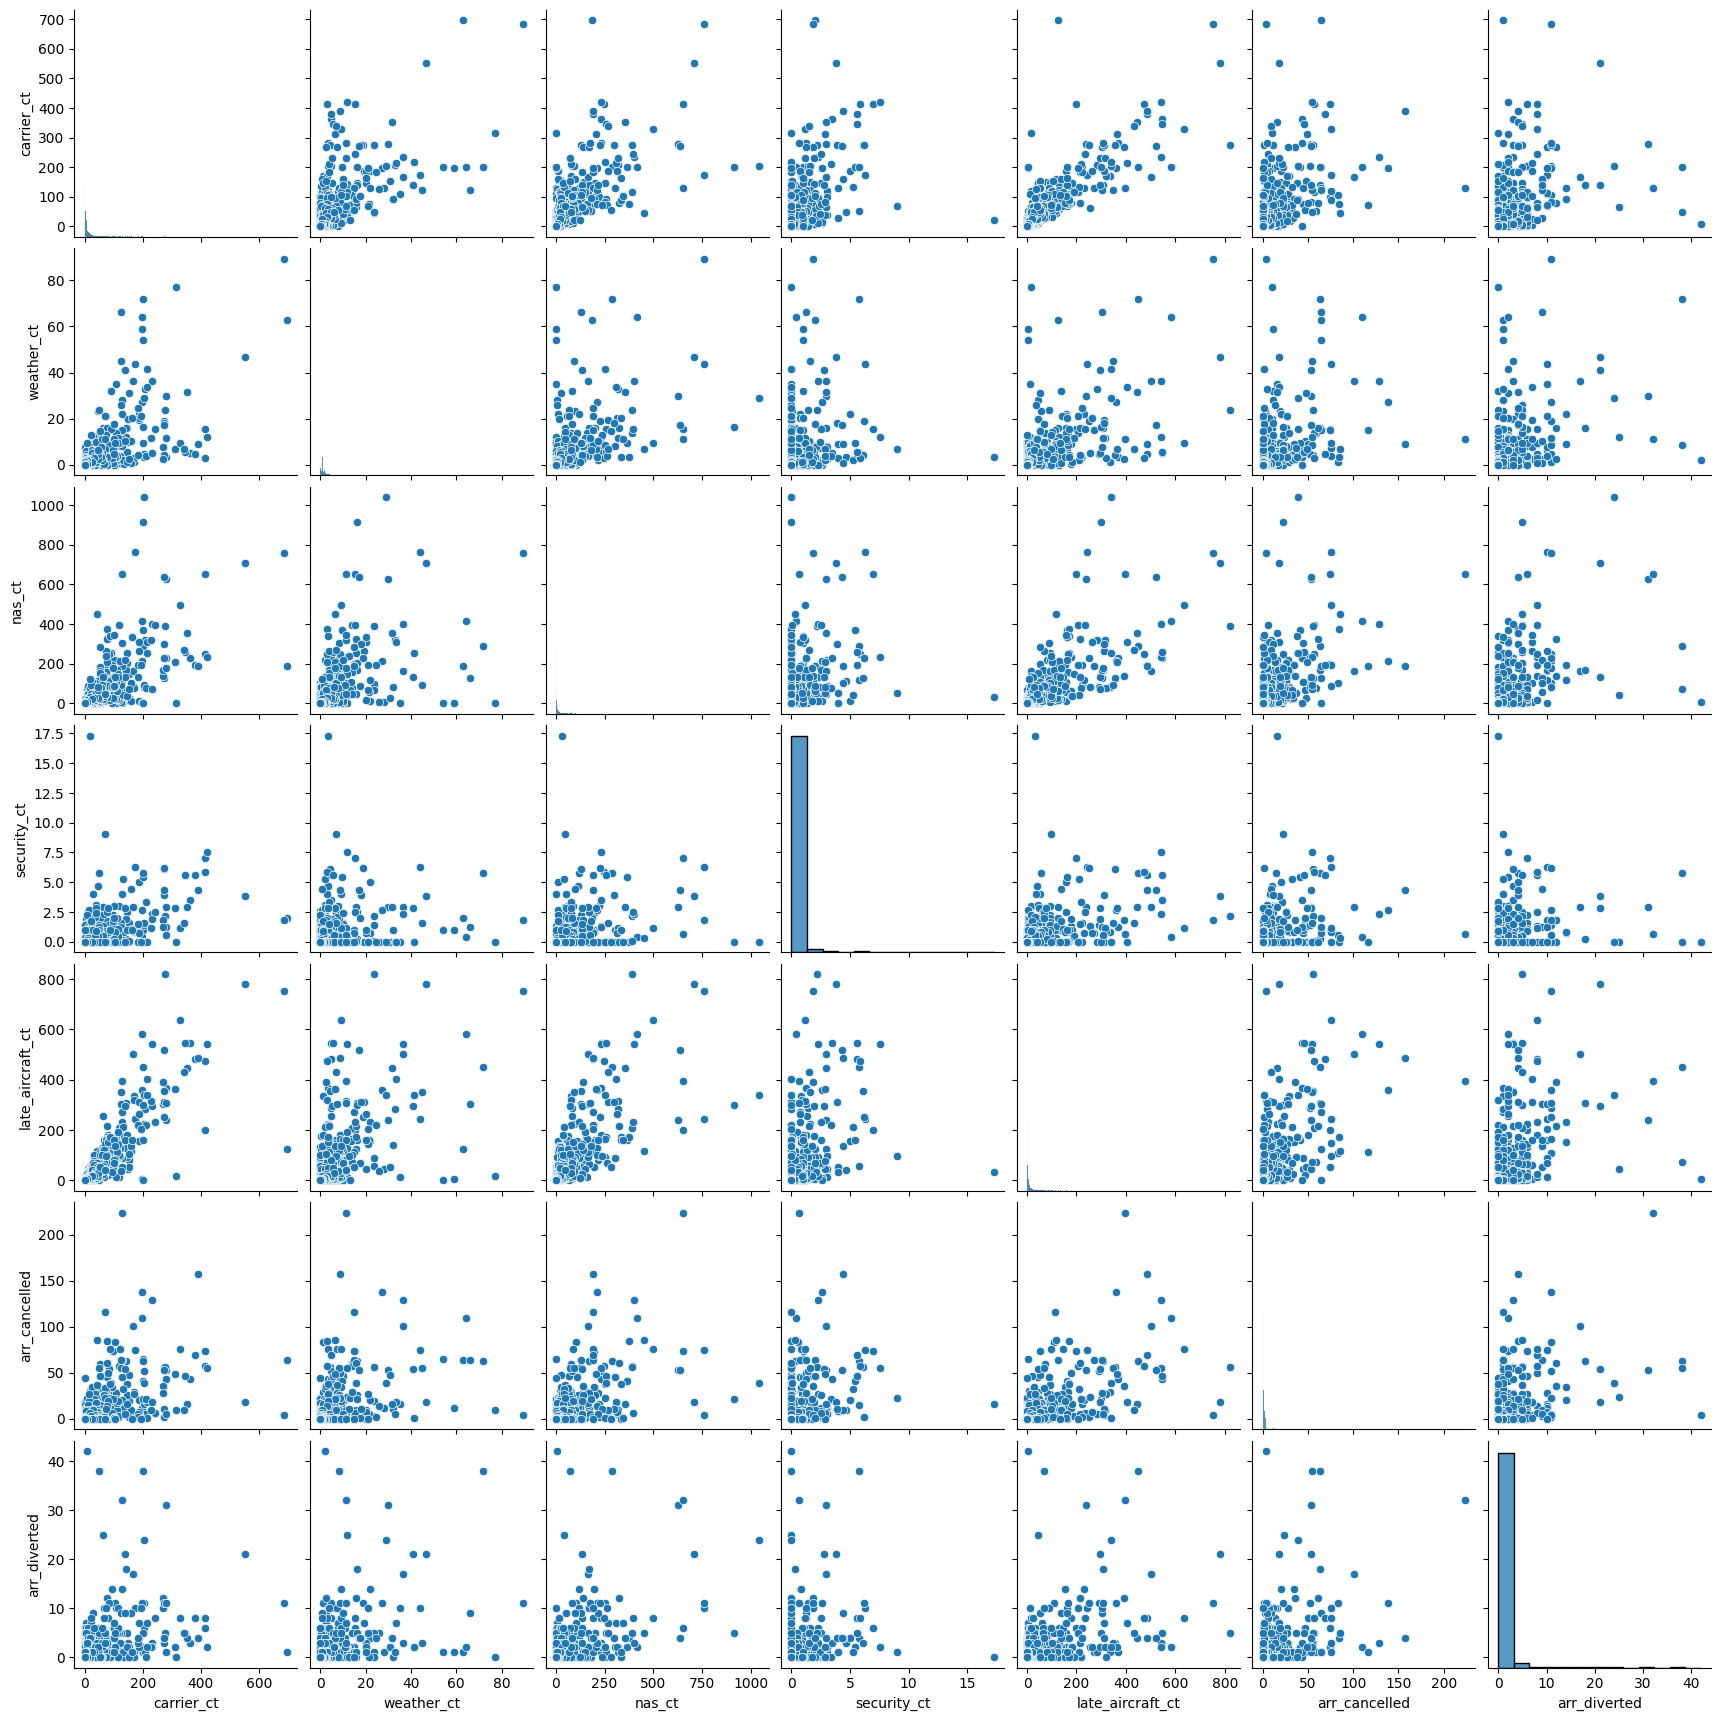

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']])
plt.show()

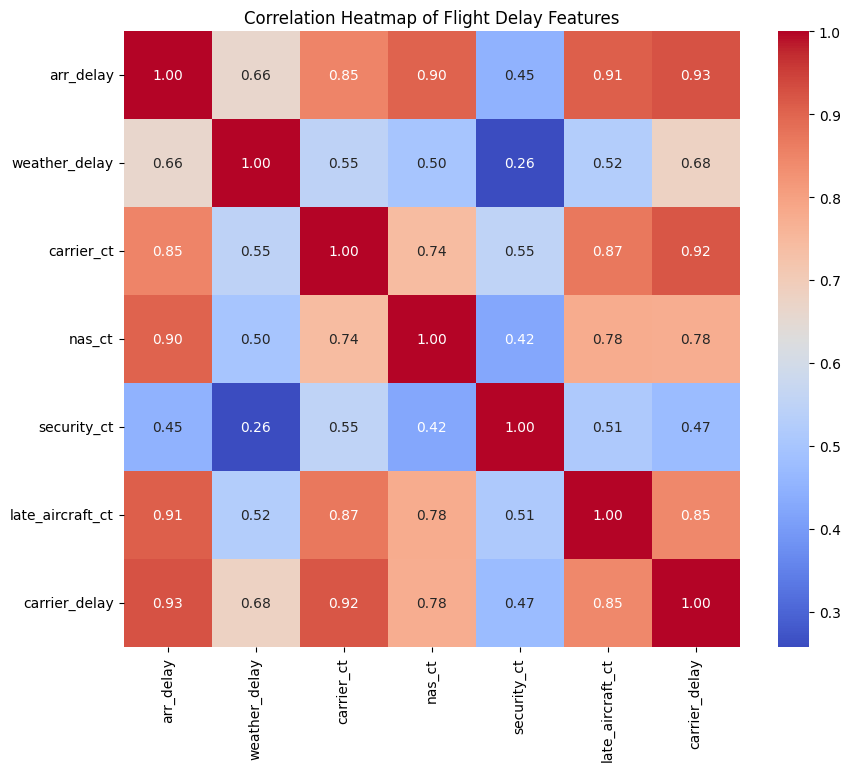

In [ ]:
correlation_matrix = df[['arr_delay', 'weather_delay', 'carrier_ct', 'nas_ct', 'security_ct',
                          'late_aircraft_ct', 'carrier_delay']].corr()

# Step 2: Create the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap of Flight Delay Features')
plt.show()

#**III. *Data Pre-processing***

Processing the dataset before using it for our model later on.

Removing outliers to keep a cleaner dataset.

In [ ]:
# prompt: remove outliers from the dataset

# Calculate the IQR for each numerical feature
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

# Print the number of rows removed
print(f"Number of rows removed: {len(df) - len(df_no_outliers)}")

# Now df_no_outliers contains the data with outliers removed

Number of rows removed: 1362


#**IV. *Building the Model***

Building the model. Using Linear Regression as the base model before utilizing the main model: **Random Forest Regression.**

Building a Linear Regression

In [ ]:
selected_features = [  'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']

X = df[selected_features]
y = df['arr_delay']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Random Forest regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = lr_model.predict(X_test)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print the evaluation metrics for training and test data
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R2):", test_r2)
print("Mean Absolute Error (MAE):", test_mae)

Mean Squared Error (MSE): 2268228.707993584
Root Mean Squared Error (RMSE): 1506.0639787185617
R-squared (R2): 0.9391038599717206
Mean Absolute Error (MAE): 635.6212195846651


Building a Random Forest Regression model

In [ ]:
# Create and train the Random Forest regression model
rfr_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rfr_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = rfr_model.predict(X_test)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print the evaluation metrics for training and test data
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R2):", test_r2)
print("Mean Absolute Error (MAE):", test_mae)

Mean Squared Error (MSE): 2521104.578565976
Root Mean Squared Error (RMSE): 1587.7986580690815
R-squared (R2): 0.9323147895530806
Mean Absolute Error (MAE): 579.7809918214617


#**V. *Feature Performance***

Checking how the model performed.


Checking which features had the significant effect to the Random Forest Regression model.

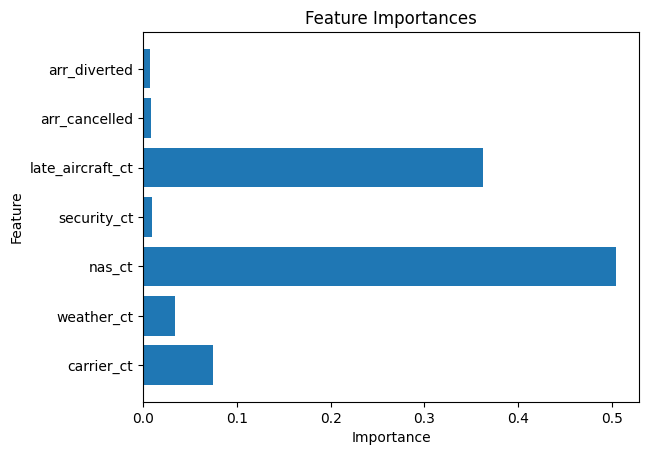

In [ ]:
ideal_test = rfr_model.feature_importances_
ideal_test = ideal_test[:len(selected_features)]  # Truncate importances

plt.barh(selected_features, ideal_test)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# VII. **Conclusion**

Testing the model with a real dataset to see how close it can predict to a value that is already known.

In [ ]:
tobe_predicted.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",85.0,8.0,4.00,0.49,...,0.0,0.00,2.0,0.0,417.0,245.0,35.0,137.0,0.0,0.0
1,2024,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",85.0,16.0,7.98,2.00,...,0.0,3.88,1.0,1.0,864.0,396.0,168.0,98.0,0.0,202.0
2,2024,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",178.0,23.0,10.96,1.36,...,0.0,5.35,6.0,1.0,1219.0,592.0,40.0,169.0,0.0,418.0
3,2024,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",82.0,18.0,7.06,0.00,...,0.0,6.85,5.0,0.0,988.0,416.0,0.0,172.0,0.0,400.0
4,2024,8,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1919.0,215.0,67.74,8.05,...,0.0,97.49,40.0,1.0,20110.0,9418.0,896.0,2047.0,0.0,7749.0


In [ ]:
# Within ideal test case
ideal_flight = pd.DataFrame({
    'carrier_ct' : [67.74],
    'weather_ct' : [8.05],
    'nas_ct' : [41.72],
    'security_ct' : [0],
    'late_aircraft_ct' : [97.49],
    'arr_cancelled' : [40],
    'arr_diverted' : [0]
}) # Index 6 new dataset. Expected arr_delay value = 20110

# Scale the new flight data
ideal_flight_scaled = scaler.transform(ideal_flight)

# Predict using both models
predicted_delay_lr = lr_model.predict(ideal_flight_scaled)
predicted_delay_rfr = rfr_model.predict(ideal_flight_scaled)

print("\nPredicted arr_delay with Linear Regression (using realistic values):", predicted_delay_lr[0])
print("Predicted arr_delay with Random Forest Regression (using realistic values):", predicted_delay_rfr[0])


Predicted arr_delay with Linear Regression (using realistic values): 17501.527777774707
Predicted arr_delay with Random Forest Regression (using realistic values): 15791.603929945615


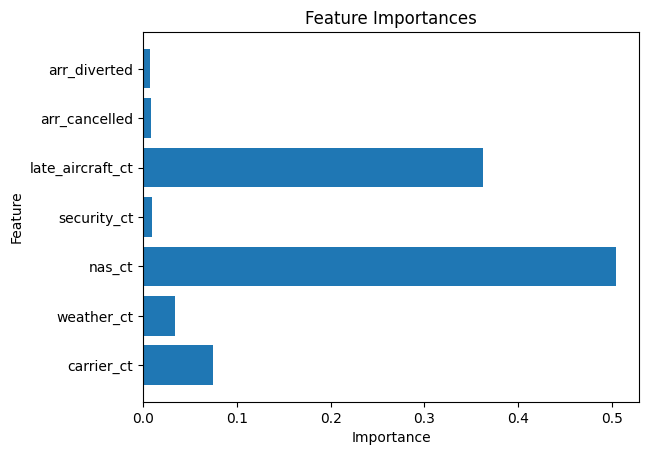

In [ ]:
# To showcase the features that significantly affect the model's performance.

importances = rfr_model.feature_importances_
importances = importances[:len(selected_features)]
plt.barh(selected_features, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:
# Test models and validate data
tobe_predicted.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",85.0,8.0,4.00,0.49,...,0.0,0.00,2.0,0.0,417.0,245.0,35.0,137.0,0.0,0.0
1,2024,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",85.0,16.0,7.98,2.00,...,0.0,3.88,1.0,1.0,864.0,396.0,168.0,98.0,0.0,202.0
2,2024,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",178.0,23.0,10.96,1.36,...,0.0,5.35,6.0,1.0,1219.0,592.0,40.0,169.0,0.0,418.0
3,2024,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",82.0,18.0,7.06,0.00,...,0.0,6.85,5.0,0.0,988.0,416.0,0.0,172.0,0.0,400.0
4,2024,8,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1919.0,215.0,67.74,8.05,...,0.0,97.49,40.0,1.0,20110.0,9418.0,896.0,2047.0,0.0,7749.0
